<a href="https://colab.research.google.com/github/Jhonatabz/matematica-computacional-cc-2025/blob/main/matematica_computacional_atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Configuração e Importações

In [47]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

# Função Auxiliar para Plotar Vetores

In [48]:
def plot_vetores(vetores, cores, legendas, titulo):
    """
    Args:
        vetores: Lista de vetores (arrays 2D do NumPy).
        cores: Lista de cores para cada vetor.
        legendas: Lista de legendas para cada vetor.
        titulo: Título do gráfico.
    """
    plt.figure(figsize=(5, 5))
    ax = plt.gca()

    # Plota cada vetor
    for vetor, cor, legenda in zip(vetores, cores, legendas):
        # Garante que o vetor tenha o formato correto (1D de 2 elementos)
        vet = vetor.flatten()
        ax.quiver(0, 0, vet[0], vet[1], angles='xy', scale_units='xy', scale=1, color=cor, label=legenda)


    # Configurações visuais
    max_val = np.max(np.abs(vetores)) * 1.5
    if max_val == 0:
        max_val = 1

    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    ax.set_aspect('equal')

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='upper left')
    plt.title(titulo)
    plt.show()

# A aplicação e a demonstração visual da rotação horária de 90°, seguida de shear (cisalhamento) em x  

A Multiplicação ($S \cdot R$)$$\underbrace{\begin{bmatrix} 1 & 1.5 \\ 0 & 1 \end{bmatrix}}_{S} \cdot \underbrace{\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}}_{R} = \begin{bmatrix} ? & ? \\ ? & ? \end{bmatrix}$$  

$$\begin{bmatrix} 1 & 1.5 \\ 0 & 1 \end{bmatrix} \cdot \begin{bmatrix} 0  \\ -1 \end{bmatrix} = 0 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + (-1) \begin{bmatrix} 1.5 \\ 1 \end{bmatrix} = \begin{bmatrix} -1.5 \\ -1 \end{bmatrix}$$  

$$\begin{bmatrix} 1 & 1.5 \\ 0 & 1 \end{bmatrix} \cdot \begin{bmatrix} 1  \\ 0 \end{bmatrix} = 1 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 0 \begin{bmatrix} 1.5 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0\end{bmatrix}$$

A Matriz Combinada Final é:$$M_{\text{final}} = \begin{bmatrix} -1.5 & 1 \\ -1 & 0 \end{bmatrix}$$

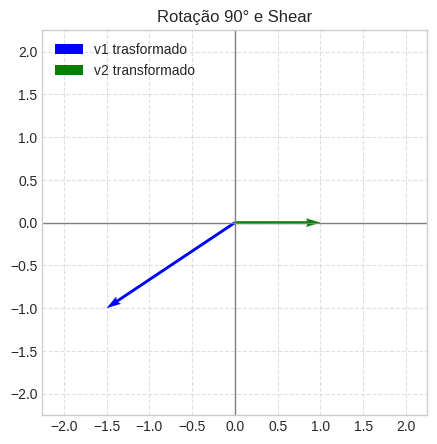

In [54]:
v1 = np.array([1, 0])
v2 = np.array([0, 1])

s = np.array([[1, 1.5],
               [0, 1]])

r = np.array([[0, 1],
               [-1, 0]])
m_final = s @ r
v1_resultante = m_final @ v1
v2_resultante = m_final @ v2
plot_vetores(
    vetores=[v1_resultante, v2_resultante],
    cores=['blue','green'],
    legendas=['v1 trasformado', 'v2 transformado'],
    titulo='Rotação 90° e Shear')

# Determinante: fator de escala da área.  
O determinante de uma matriz $2 \times 2$ $\begin{bmatrix} a & b \\ c & d \end{bmatrix}$ é calculado como $ad - bc$.  
### A matriz combinada é:
$$M = \begin{bmatrix} -1.5 & 1 \\ -1 & 0 \end{bmatrix}$$  
$$\det(M) = (-1.5)(0) - (1)(-1)$$$$\det(M) = 0 - (-1)$$$$\det(M) = \mathbf{1}$$  
O determinante da matriz é 1, o mesmo valor da área inicial (1).
Isso significa que, apesar de a transformação deformar e reorientar os vetores, a quantidade total de área permanece igual, ou seja, a transformação preserva área.
Não ocorreu alongamento, encurtamento ou inversão da orientação

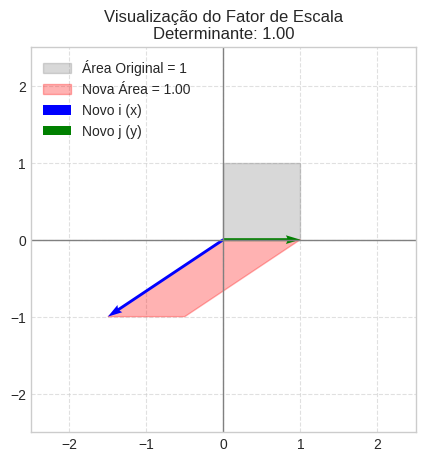

In [50]:
def visualizar_transformacao_area(matriz, titulo):

    plt.figure(figsize=(5, 5))
    ax = plt.gca()

    # Definir o Quadrado Unitário (Base Original)
    i_unitario = np.array([1, 0])
    j_unitario = np.array([0, 1])

    # Coordenadas do quadrado
    quadrado_x = [0, 1, 1, 0]
    quadrado_y = [0, 0, 1, 1]

    # Plota a área original
    plt.fill(quadrado_x, quadrado_y, color='gray', alpha=0.3, label='Área Original = 1')

    # Calcular os Vetores Transformados pela Matriz
    novo_i = matriz @ i_unitario
    novo_j = matriz @ j_unitario

    # Definir o Paralelogramo Transformado
    # O quarto ponto do paralelogramo é a soma vetorial (novo_i + novo_j)
    soma_vetores = novo_i + novo_j

    para_x = [0, novo_i[0], soma_vetores[0], novo_j[0]]
    para_y = [0, novo_i[1], soma_vetores[1], novo_j[1]]

    # Plota a nova área
    det = np.linalg.det(matriz)
    plt.fill(para_x, para_y, color='red', alpha=0.3, label=f'Nova Área = {abs(det):.2f}')

    # 4. Desenhar os Vetores por cima para referência
    origem = [0, 0]
    ax.quiver(*origem, *novo_i, angles='xy', scale_units='xy', scale=1, color='blue', label='Novo i (x)')
    ax.quiver(*origem, *novo_j, angles='xy', scale_units='xy', scale=1, color='green', label='Novo j (y)')

    # Configurações visuais
    todos_x = quadrado_x + para_x
    todos_y = quadrado_y + para_y
    max_limit = max(max(np.abs(todos_x)), max(np.abs(todos_y))) + 1

    ax.set_xlim([-max_limit, max_limit])
    ax.set_ylim([-max_limit, max_limit])
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    ax.set_aspect('equal')

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='upper left')
    plt.title(f"{titulo}\nDeterminante: {det:.2f}")
    plt.show()


# Definindo a Matriz Final
m_final = np.array([
    [-1.5, 1],
    [-1, 0]
])

visualizar_transformacao_area(m_final, "Visualização do Fator de Escala")

# Invertendo a Ordem das Transformações  

A Multiplicação ($R \cdot S$)$$\underbrace{\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}}_{R} \cdot \underbrace{\begin{bmatrix} 1 & 1.5 \\ 0 & 1 \end{bmatrix}}_{S} \cdot = \begin{bmatrix} ? & ? \\ ? & ? \end{bmatrix}$$  

$$\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} \cdot \begin{bmatrix} 1  \\ 0 \end{bmatrix} = 1 \begin{bmatrix} 0 \\ -1 \end{bmatrix} + 0 \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ -1\end{bmatrix}$$  

$$\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} \cdot \begin{bmatrix} 1.5  \\ 1 \end{bmatrix} = 1.5 \begin{bmatrix} 0 \\ -1 \end{bmatrix} + 1 \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ -1.5\end{bmatrix}$$  

A Matriz Combinada Final é:$$M_{\text{final}} = \begin{bmatrix} 0 & 1 \\ -1 & -1.5 \end{bmatrix}$$  

### Determinante:  

$$\det(M) = (0)(-1.5) - (1)(-1)$$$$\det(M) = \mathbf{1}$$
o determinante permanece igual, pois depende apenas do produto dos determinantes individuais das transformações. Assim, a área e a orientação são preservadas independentemente da ordem. A ordem das transformações altera o formato, mas não o fator de escala.

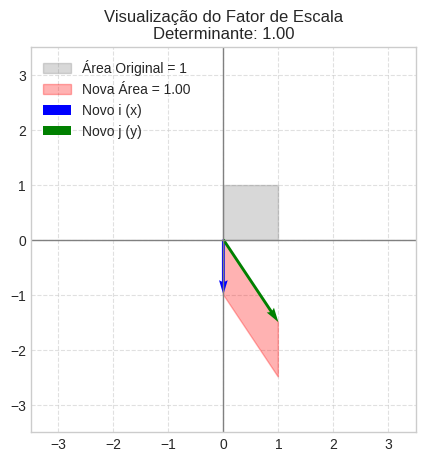

In [51]:
m_exercicio = np.array([
    [0, 1],
    [-1, -1.5]
])
visualizar_transformacao_area(m_exercicio, "Visualização do Fator de Escala")

# Transformação Linear em um vetor x de duas dimensões para obter um vetor y orientado a 90° em relação a x

Assumindo um vetor x:  
$$x = \begin{bmatrix}2 \\ 3\end{bmatrix}$$  

A matriz de rotação é:$$M = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$$  

Aplicando essa transformação ao vetor $x$ para obter $y$:$$y = M \cdot x = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 2 \\ 3 \end{bmatrix}$$  
$$y = 2 \begin{bmatrix} 0 \\ 1 \end{bmatrix} + 3\begin{bmatrix} -1 \\ 0 \end{bmatrix} = \begin{bmatrix} -3 \\ 2 \end{bmatrix}$$  

O Produto Escalar ($x \cdot y$) é a soma da multiplicação dos componentes correspondentes: $$x \cdot y = (2)(-3) + (3)(2) = 0$$  
Quando o produto escalar entre dois vetores não nulos é 0, isso prova matematicamente que os vetores são perpendiculares (ortogonais) entre si. Ou seja, se você desenhar o vetor $x$ e o vetor transformado $y$, eles formarão um canto perfeito de um quadrado (ângulo reto).

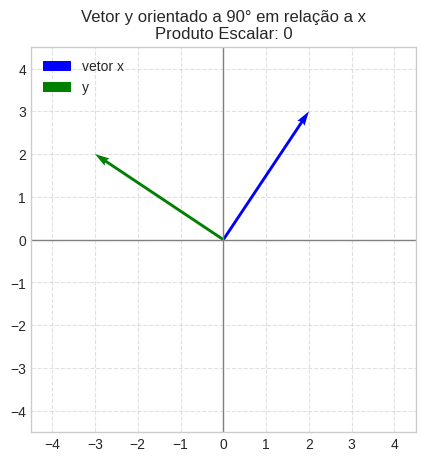

In [52]:
# Definindo o vetor x
x = np.array([2, 3])

# Criando o vetor y (rotacionado 90 graus)
y = np.array([-3, 2])

# Calculando o produto escalar
resultado = np.dot(x, y)

plot_vetores(
    vetores=[x, y],
    cores=['blue', 'green'],
    legendas=['vetor x', 'y'],
    titulo=f"Vetor y orientado a 90° em relação a x\nProduto Escalar: {resultado}",
)